In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(29)

In [10]:
data = np.random.random((nrows, ncols))
data

array([[0.46762045, 0.70078355],
       [0.18897809, 0.54312897],
       [0.253291  , 0.43836437],
       ...,
       [0.15008559, 0.37577491],
       [0.34690321, 0.58934311],
       [0.97135998, 0.57219933]])

In [11]:
naps = data < p_nap
naps

array([[False, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [False, False],
       [False, False]])

In [12]:
naps.sum(axis=1)

array([0, 1, 1, ..., 1, 0, 0])

In [13]:
np.unique(naps)

array([False,  True])

In [14]:
np.unique(naps.sum(axis=1))

array([0, 1, 2])

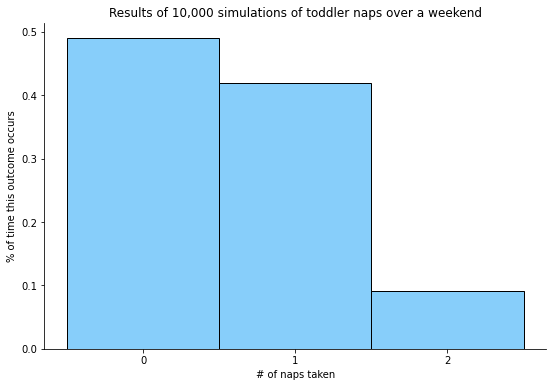

In [15]:
viz.simulation_example2(naps)

In [16]:
(naps.sum(axis=1) >= 1).mean()

0.50998

In [17]:
(naps.sum(axis=1) == 0).mean()


0.49002

In [18]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())


0.42324

In [22]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

rolls = pd.DataFrame(rolls)
 
rolls["has_at_least_one_three"] = rolls.apply(lambda row: 3 in row.values, axis=1)
 
rolls.has_at_least_one_three.mean()

0.42251

In [23]:
### Exercises
# 1. How likely is it that you roll doubles when rolling two dice?

# 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

# 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

# 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

# 5. Compare Heights

### Men have an average height of 178 cm and standard deviation of 8cm.
### Women have a mean of 170, sd = 6cm.
### Since you have means and standard deviations, you can use np.random.normal to generate observations.
### If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?
### When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

# 6. What is the probability that we observe an installation issue within the first 150 students that download anaconda?

### How likely is it that 450 students all download anaconda without an issue?

# 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

### How likely is it that a food truck will show up sometime this week?

# 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?